In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from tensorflow.python.ops import rnn, rnn_cell

# Hyperparameters

In [2]:
train_length = 1000
test_length = 1500

discount_rate = 0.995
rnn_size = 10

sampling_rate = 200
striding = 100

In [3]:
def downgrade_and_feature(array):
    nchannels = array.shape[0]
    data_length = array.shape[1]
    
    temp = np.zeros(data_length)
    
    for j in range(data_length):
        for i in range(nchannels):
            temp[j] += array[i][j]
        temp[j]/=nchannels
    
    reduced_length = int(data_length/striding)

    averages = np.zeros(reduced_length, dtype = np.float32)   
    variations = np.zeros(reduced_length, dtype = np.float32)
    
    for i in range(reduced_length):
        averages[i] = np.average(temp[striding*i:striding*(i+1)])
        variations[i] = np.var(temp[striding*i:striding*(i+1)])
        
    return {'averages' : averages,'variations' : variations}

In [4]:
def dataload(patient_number, dataset_number):
    try :
        input_folder_path = '/home/maestroj/medical_analysis/eeg_csv'
        input_data_name = 'data{}_{}.csv'.format(patient_number,dataset_number)
        input_data_path = os.path.join(input_folder_path,input_data_name)
        input_file = open(input_data_path,'r',newline='')
        reader = csv.reader(input_file, delimiter=',')
        print("{} is loaded".format(input_data_name))
        temp = []
        for row in reader:
            temp.append(row)
        temp = np.array(temp, dtype=np.float32)
        temp = np.transpose(temp)
        return temp
    except FileNotFoundError:
        print("No such File")
        temp = []
        temp = np.array(temp)
        return temp

In [5]:
def time_axis_maker(array, sec_per_cell,init = 0):
    final = init + sec_per_cell*(len(array)-1)
    return np.linspace(init,final,len(array))

# Onset-time data

In [6]:
def seizure_time_parser(onset_times,patient_number,data_set_number):
    temp = str(onset_times[patient_number-1][data_set_number])
    curr_onset_time = []
    while temp.find('/')!=-1:
        curr_onset_time.append(int(temp[0:temp.find('/')]))
        temp=temp[temp.find('/')+1:]
    curr_onset_time.append(int(float(temp)))
    curr_onset_time=np.array(curr_onset_time)
    return curr_onset_time

In [7]:
seizure_file = open('seizure_times.csv','r',newline='')
reader = csv.reader(seizure_file,delimiter=',')
onset_times_temp=[]

for row in reader:
    onset_times_temp.append(row)
    
onset_times = []
total_patient = len(onset_times_temp)
event_number = np.zeros(total_patient,dtype=np.int32)
#number of events of (i+1) patient = event_number[i]

for i in range(total_patient):
    event_number[i] = len(onset_times_temp[i])-1

for p in range(total_patient):
    temp = []
    for d in range(event_number[p]):
        temp.append(seizure_time_parser(onset_times_temp,p+1,d+1))
    onset_times.append(temp)

In [8]:
print("The number of datasets of patients")
print(event_number)
print("1st patient's seizure time for each data_set")
print(onset_times[0][1])
print("9th patient's seizure time for each data_set")
print(onset_times[8])

The number of datasets of patients
[ 7  7  6  3 10  1  7 13 16  8  8  5  3  6 31  8  2  4]
1st patient's seizure time for each data_set
[781]
9th patient's seizure time for each data_set
[array([200]), array([312]), array([624]), array([762]), array([752]), array([772]), array([884]), array([502]), array([ 94, 258]), array([836]), array([650]), array([636]), array([576]), array([656]), array([638]), array([706])]


In [9]:
temp = dataload(1,1)
print(temp.shape)
result = downgrade_and_feature(temp)
print(result['averages'].shape)
print(result['variations'].shape)
time = time_axis_maker(result['averages'], striding/sampling_rate)

data1_1.csv is loaded
(22, 315200)
(3152,)
(3152,)


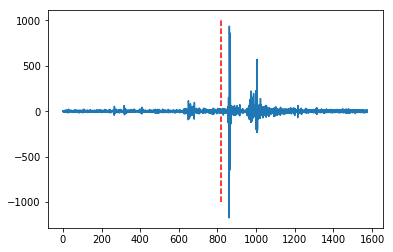

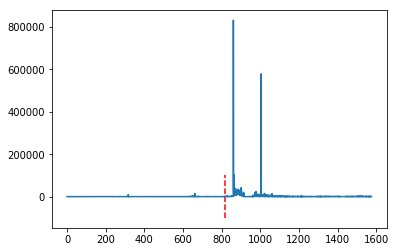

In [10]:
plt.plot(time, result['averages'])
plt.vlines(onset_times[0][0], -1000, 1000, colors='r', linestyles='--')
plt.show()

plt.plot(time, result['variations'])
plt.vlines(onset_times[0][0], -100000, 100000, colors='r', linestyles='--')
plt.show()

In [12]:
restorer = tf.train.import_meta_graph('rnn_v5.meta')
sess = tf.Session()
restorer.restore(sess, tf.train.latest_checkpoint('./'))
hypo_vars = tf.get_collection('hypothesis')
input_vars = tf.get_collection('test_input')
test_x = input_vars[0]
temp_test_outputs = hypo_vars[0]

# Test_set_generator

In [13]:
def test_set_generator(patient_number, dataset_number):
    result = downgrade_and_feature(dataload(patient_number,dataset_number))
    input_data = np.zeros((2,test_length))
    for i in range(test_length):
        input_data[0][i] = result['averages'][i]
        input_data[1][i] = result['variations'][i]

    return {'input' : input_data}

Patient 1 and dataset 1
seizure_time = 820
data1_1.csv is loaded


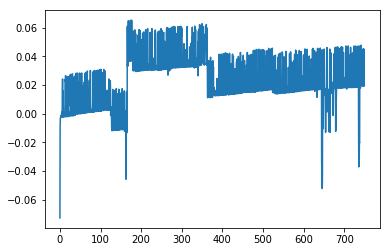

Patient 1 and dataset 2
seizure_time = 781
data1_2.csv is loaded


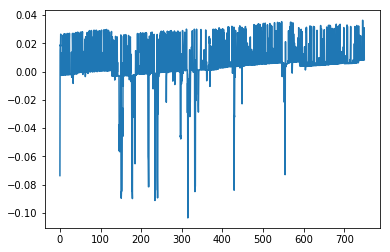

Patient 1 and dataset 3
seizure_time = 626
data1_3.csv is loaded


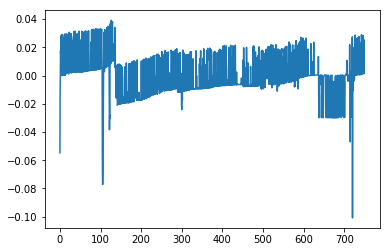

Patient 1 and dataset 4
seizure_time = 713
data1_4.csv is loaded


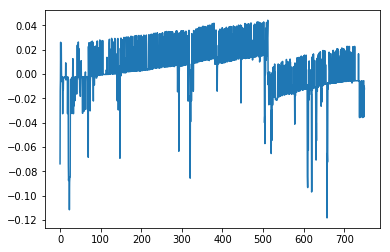

Patient 1 and dataset 5
seizure_time = 807
data1_5.csv is loaded


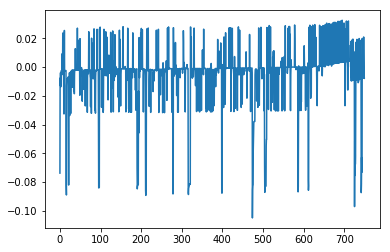

Patient 1 and dataset 6
seizure_time = 792
data1_6.csv is loaded


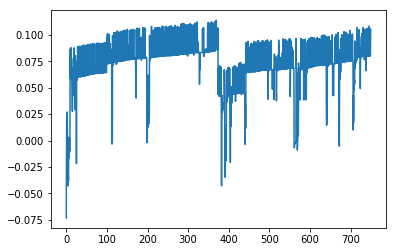

Patient 1 and dataset 7
seizure_time = 780
data1_7.csv is loaded


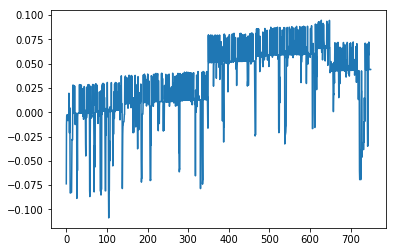

Patient 2 and dataset 1
seizure_time = 790
data2_1.csv is loaded


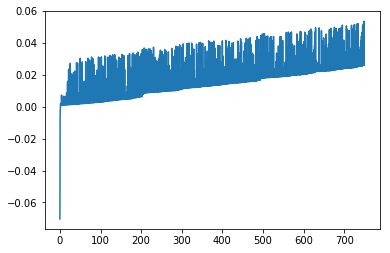

Patient 2 and dataset 2
seizure_time = 600
data2_2.csv is loaded


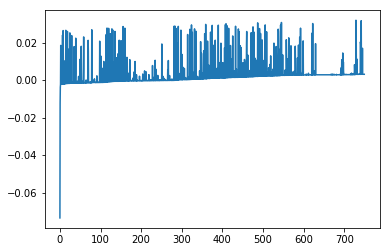

Patient 2 and dataset 3
seizure_time = 926
data2_3.csv is loaded


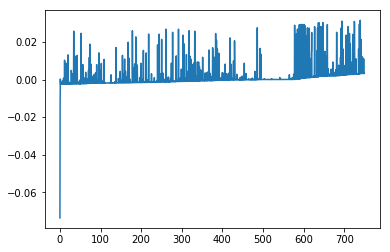

Patient 2 and dataset 4
seizure_time = 921
data2_4.csv is loaded


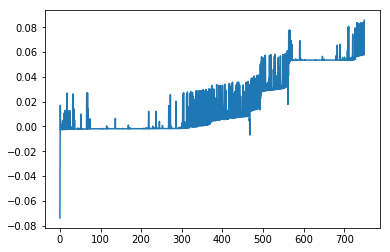

Patient 2 and dataset 5
seizure_time = 1021
data2_5.csv is loaded


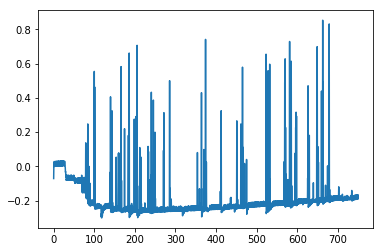

Patient 2 and dataset 6
seizure_time = 1102
data2_6.csv is loaded


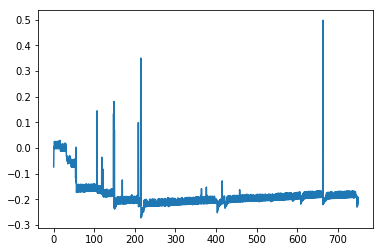

Patient 2 and dataset 7
seizure_time = 1252
data2_7.csv is loaded


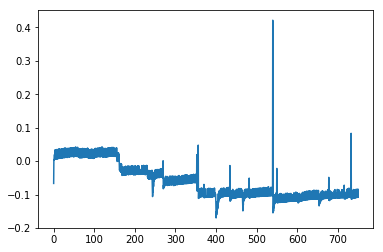

Patient 3 and dataset 1
seizure_time = 594
data3_1.csv is loaded


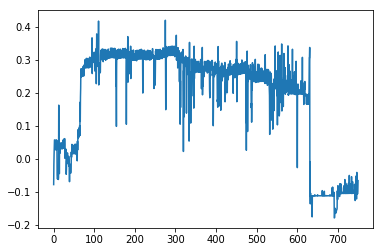

Patient 3 and dataset 5
seizure_time = 1024
data3_5.csv is loaded


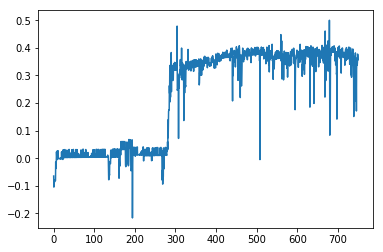

Patient 3 and dataset 6
seizure_time = 738
data3_6.csv is loaded


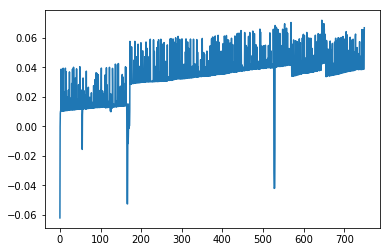

Patient 4 and dataset 1
seizure_time = 734
data4_1.csv is loaded


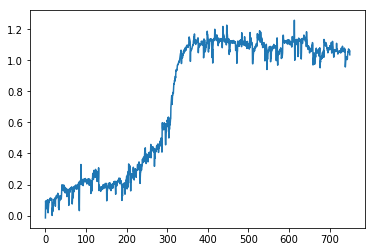

Patient 4 and dataset 2
seizure_time = 547
data4_2.csv is loaded


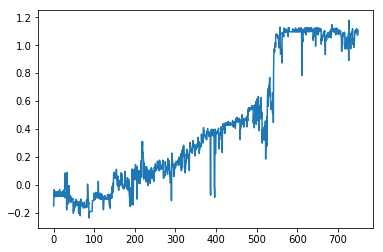

Patient 4 and dataset 3
seizure_time = 672
data4_3.csv is loaded


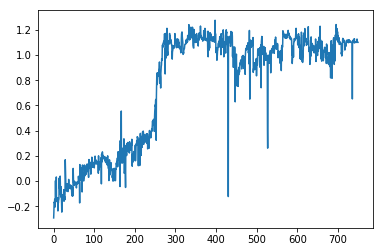

Patient 5 and dataset 2
seizure_time = 696
data5_2.csv is loaded


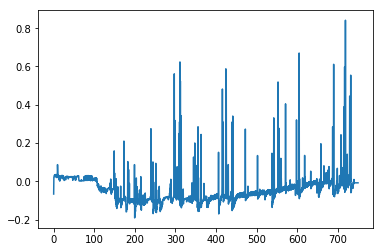

Patient 5 and dataset 3
seizure_time = 616
data5_3.csv is loaded


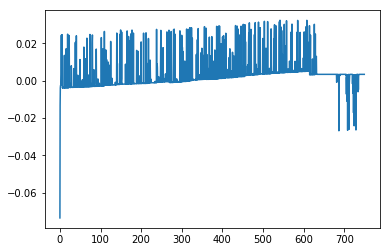

Patient 5 and dataset 4
seizure_time = 675
data5_4.csv is loaded


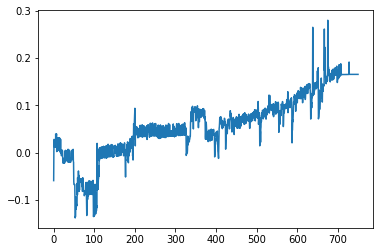

Patient 6 and dataset 1
seizure_time = 725
data6_1.csv is loaded


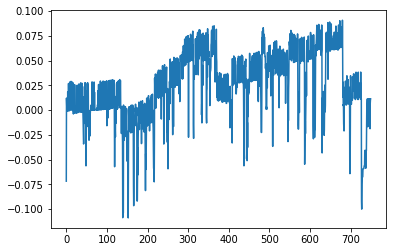

Patient 7 and dataset 1
seizure_time = 680
data7_1.csv is loaded


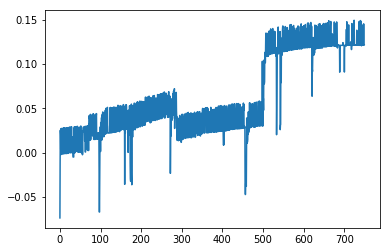

Patient 7 and dataset 2
seizure_time = 833
data7_2.csv is loaded


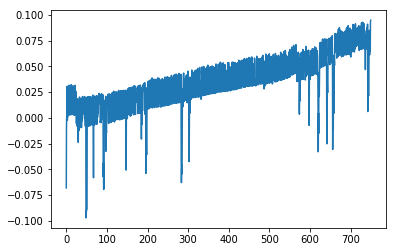

Patient 7 and dataset 3
seizure_time = 715
data7_3.csv is loaded


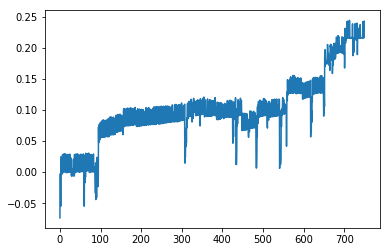

Patient 7 and dataset 4
seizure_time = 761
data7_4.csv is loaded


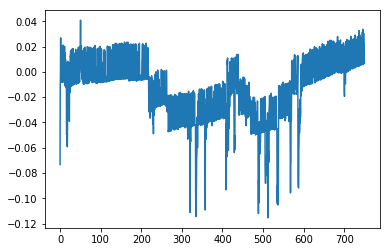

Patient 7 and dataset 5
seizure_time = 775
data7_5.csv is loaded


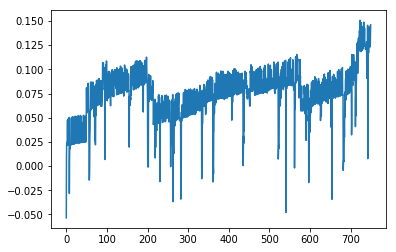

Patient 7 and dataset 6
seizure_time = 733
data7_6.csv is loaded


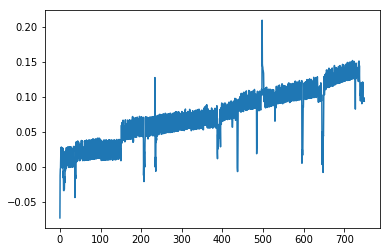

Patient 7 and dataset 7
seizure_time = 836
data7_7.csv is loaded


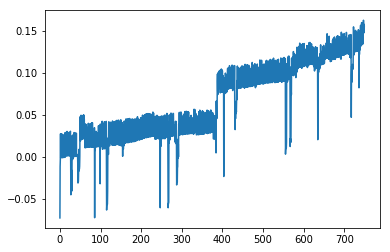

Patient 8 and dataset 1
seizure_time = 675
data8_1.csv is loaded


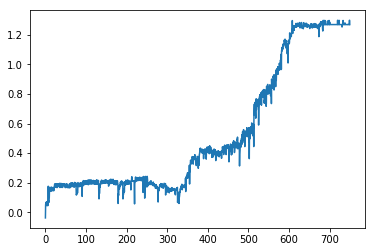

Patient 8 and dataset 2
seizure_time = 593
data8_2.csv is loaded


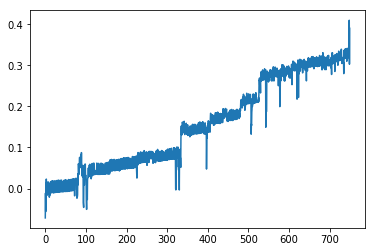

Patient 8 and dataset 3
seizure_time = 769
data8_3.csv is loaded


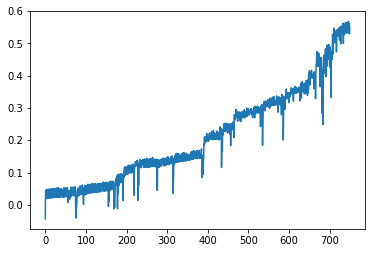

Patient 8 and dataset 4
seizure_time = 631
data8_4.csv is loaded


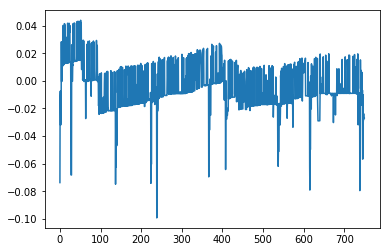

Patient 8 and dataset 5
seizure_time = 693
data8_5.csv is loaded


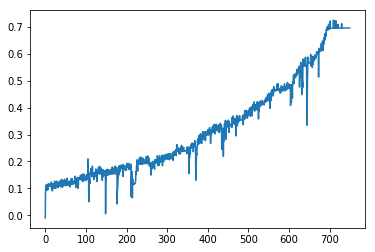

Patient 8 and dataset 6
seizure_time = 685
data8_6.csv is loaded


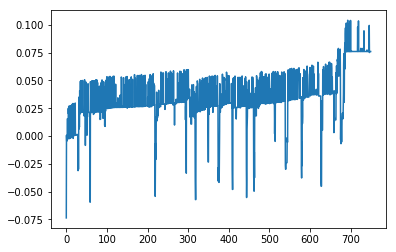

Patient 8 and dataset 7
seizure_time = 751
data8_7.csv is loaded


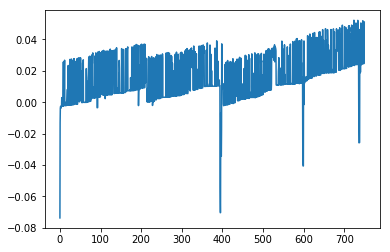

Patient 8 and dataset 9
seizure_time = 569
data8_9.csv is loaded


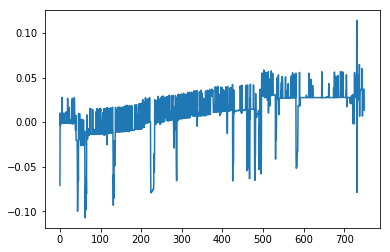

Patient 8 and dataset 10
seizure_time = 623
data8_10.csv is loaded


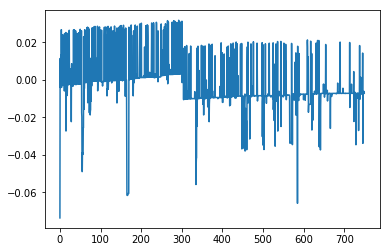

Patient 8 and dataset 11
seizure_time = 708
data8_11.csv is loaded


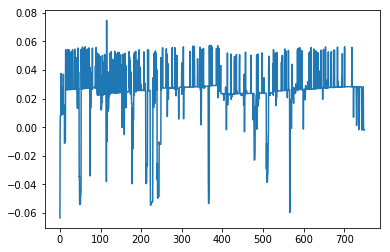

Patient 8 and dataset 12
seizure_time = 667
data8_12.csv is loaded


KeyboardInterrupt: 

In [19]:
for test_patient_number in range(len(onset_times)):
    for test_dataset_number  in range(len(onset_times[test_patient_number])):
        if len(onset_times[test_patient_number][test_dataset_number])>1:
            continue;
        onset_time_temp = onset_times[test_patient_number][test_dataset_number][0]
        if onset_time_temp*sampling_rate/striding < train_length:
            continue;
        print("Patient {} and dataset {}".format(test_patient_number+1,test_dataset_number+1))
        print("seizure_time = {}".format(onset_time_temp))
        result = test_set_generator(test_patient_number+1, test_dataset_number+1)
        input_data = result['input']
        time = time_axis_maker(input_data[0],striding/sampling_rate)
        plt.plot(time, sess.run(temp_test_outputs, feed_dict = {test_x : input_data}))
        plt.show()